# **Análisis Exploratorio de Datos**

En este notebook se realizá un análisis exploratorio de los datos del dataset [Global Air Pollution][kaggle] de Kaggle


[kaggle]: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset
#### **Información del Dataset**
Este dataset contiene información sobre los niveles de contaminación del aire en diferentes ciudades y países alrededor del mundo. Los datos incluyen mediciones de los principales contaminantes del aire, como monóxido de carbono (CO), ozono (O₃), dióxido de nitrógeno (NO₂) y partículas finas (PM2.5), junto con sus respectivos índices de calidad del aire (AQI).

Cada registro en este conjunto de datos representa las concentraciones de estos contaminantes en una ciudad en particular, proporcionando una clasificación de la calidad del aire que puede ser: 

- Buena
- Moderada
- Dañina para Grupos Sensibles
- Dañina
- Muy Dañina
- Peligrosa

#### **Objetivos**

- Descripción de las columnas del dataset
- Identificación de valores nulos y duplicados
- Visualización Inicial del conjunto de datos

### Importar librerías 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Cargando el dataset
try:
    ruta = '../data/global_air_pollution.csv'
    df = pd.read_csv(ruta)
except:
    print("No se encuentra la ruta del dataset")

### Dimensión del Dataset (Filas, Columnas)

In [7]:
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

Filas: 23463
Columnas: 12


### Inspección Inicial del Dataset
#### Distinción entre Variables Númericas y Categoricas

In [15]:
variables_numericas = df.dtypes[df.dtypes != 'object'].index
print(f"Cantidad de variables numéricas: {len(variables_numericas)}")
print("Las variables son:")
for variable in variables_numericas:
    print(f" - {variable}")

Cantidad de variables numéricas: 5
Las variables son:
 - AQI Value
 - CO AQI Value
 - Ozone AQI Value
 - NO2 AQI Value
 - PM2.5 AQI Value


In [17]:
variables_categoricas = df.dtypes[df.dtypes == 'object'].index
print(f"Cantidad de variables categóricas: {len(variables_categoricas)}")
print("Las variables son:")
for variable in variables_categoricas:
    print(f" - {variable}")

Cantidad de variables categóricas: 7
Las variables son:
 - Country
 - City
 - AQI Category
 - CO AQI Category
 - Ozone AQI Category
 - NO2 AQI Category
 - PM2.5 AQI Category


### Estructura del Conjunto de Datos
#### Características
1. `Country` : Nombre del país
2. `City`: Nombre de la ciudad
3. `AQI Value`: Valor AQI general de la ciudad
4. `AQI Category`: Categoría general del AQI de la ciudad
5. `CO AQI Value`: Valor AQI de monóxido de carbono de la ciudad
6. `CO AQI Category`: Categoría AQI de monóxido de carbono de la ciudad
7. `Ozone AQI Value`: valor AQI del ozono de la ciudad
8. `Ozone AQI Category`: Categoría AQI del ozono de la ciudad
9. `NO2 AQI Value`: Valor AQI de dióxido de nitrógeno de la ciudad
10. `NO2 AQI Category`: Categoría AQI del dióxido de nitrógeno de la ciudad
11. `PM2.5 AQI Value`: Valor AQI de materia particulada con un diámetro de 2,5 micrómetros o menos de la ciudad.
12. `PM2.5 AQI Category`: Categoría AQI de materia particulada con un diámetro de 2,5 micrómetros o menos de la ciudad.

#### Resumen Estadístico

In [20]:
df.describe().round(2)

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.00,23463.00,23463.00,23463.00,23463.00
mean,72.01,1.37,35.19,3.06,68.52
std,56.06,1.83,28.10,5.25,54.80
min,6.00,0.00,0.00,0.00,0.00
25%,39.00,1.00,21.00,0.00,35.00
50%,55.00,1.00,31.00,1.00,54.00
75%,79.00,1.00,40.00,4.00,79.00
max,500.00,133.00,235.00,91.00,500.00


### Primeras 5 Filas del Dataset

In [21]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


### Distribución y Visualización de Variables

Antes de aplicar cualquier transformación, es importante entender cómo se distribuyen las variables en su estado original. Esto nos ayuda a detectar asimetrías, outliers o los titpos de distribuciones si son normales, uniformes o bimodales.

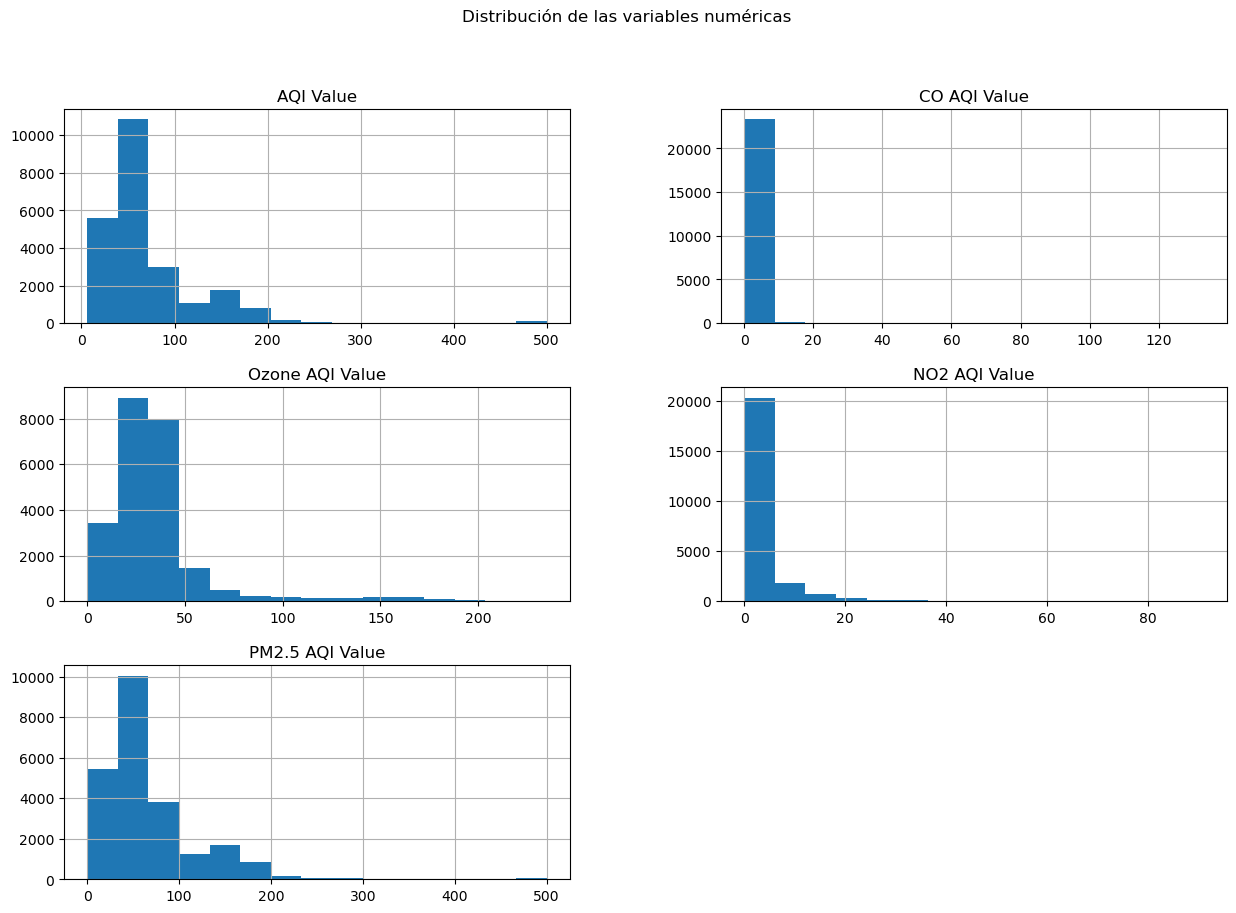

In [26]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribución de las variables numéricas")
plt.show()

#### Correlaciones entre las variables numéricas

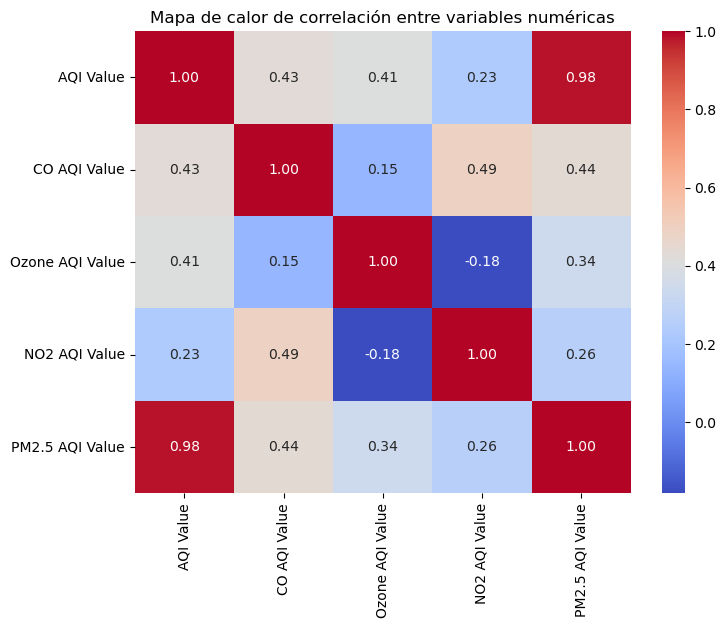

In [25]:
# Mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

* "AQI Value" y "PM2.5 AQI Value" tienen una correlación de 0.98, lo que significa que están fuertemente relacionadas.

* "Ozone AQI Value" y "NO2 AQI Value" tienen un valor de -0.18, mostrando una relación débilmente negativa.

### Cantidad de categorías de AQI (Índice de Calidad del Aire)

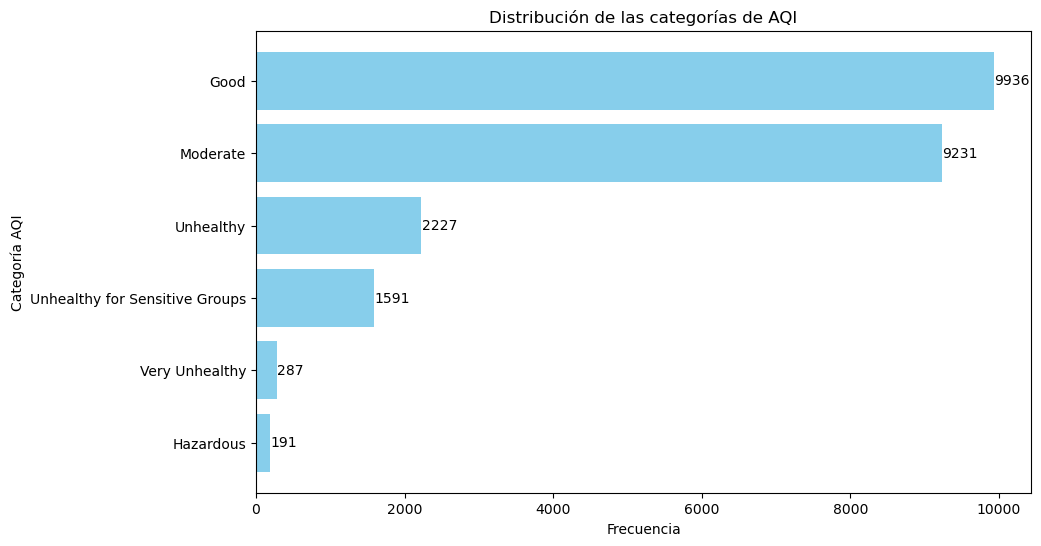

In [27]:
# Se cálcula la cantidad de categorías y se ordena de forma ascendente
categorias = df['AQI Category'].value_counts().sort_values(ascending=True)

# Gráfico de barras horizontales
plt.figure(figsize=(10,6))
bars = plt.barh(categorias.index, categorias.values, color='skyblue')

# Etiquetas de datos
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, 
             str(int(bar.get_width())), va='center', fontsize=10)
    
plt.title('Distribución de las categorías de AQI')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría AQI')

plt.show()